# TP3 AA1 Clasificación

**Krabbe Valentina**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

###**Elegi el dataset Haberman's Survival**
Que contiene casos de un estudio que se realizo en el Hospital Billings, de la Universidad de Chicago entre 1858 y 1970, donde se estudio la supervivencia de pacientes sometidos a cirugia por cancer de mama.



###**Variables**
>Edad: del paciente al momento de la operacion (int)

>Año: de la operacion del paciente (int)

>Nro de de ganglios axilares positivos detectados (int)

>Estado de supervivencia (atributo de clase):
  - 1 = el paciente sobrevivió 5 años o más.
  - 2 = el paciente falleció dentro de los 5 años.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el dataset:
link_dataset='https://raw.githubusercontent.com/valentina-krabbe/Aprendizaje-Autom-tico-1/refs/heads/main/haberman.data'
columnas=['edad','año_operacion','nro_ganglios','estado_supervivencia']
df=pd.read_csv(link_dataset,names=columnas)

print(df.head())

   edad  año_operacion  nro_ganglios  estado_supervivencia
0    30             64             1                     1
1    30             62             3                     1
2    30             65             0                     1
3    31             59             2                     1
4    31             65             4                     1


Antes de seguir vamos a hacer unos cambios en la columna del target (https://colab.research.google.com/drive/1O9C_2qcVSspm1K_DiVJNmeQHo7omWXhM#scrollTo=8XGV82DNgtNz&line=1&uniqifier=1) porque mas adelante me trajo problemas siendo que necesito que la clase 2 sea tomada como positiva (1) en ejercicios posteriores a voy a cambiar ahora. No traera ningun cambio en las demas columnas, solo que ahora identificaremos las clases como:[0=sobrevive, 1=no sobrevive]. Esto se lo plantie a ChatGPT para poder seguir rapido con el trabajo.

In [3]:
# Tipo de dato de la columna
print(f"Tipo de dato de 'estado_supervivencia': {df['estado_supervivencia'].dtype}")

Tipo de dato de 'estado_supervivencia': int64


In [4]:
# Valores únicos y su conteo
# Esto es CRÍTICO para saber si realmente solo hay 1s y 2s, y si son numéricos.
print("\nValores únicos y su conteo ANTES de la transformación:")
print(df['estado_supervivencia'].value_counts())


Valores únicos y su conteo ANTES de la transformación:
estado_supervivencia
1    225
2     81
Name: count, dtype: int64


In [5]:
# Si hay NaNs (valores faltantes) al inicio
print(f"\nCantidad de NaNs ANTES de la transformación: {df['estado_supervivencia'].isnull().sum()}")


Cantidad de NaNs ANTES de la transformación: 0


In [6]:
# Ahora, aplicamos la transformación.
df['estado_supervivencia'] = np.where(df['estado_supervivencia'] == 1, 0,
                                       np.where(df['estado_supervivencia'] == 2, 1,
                                                df['estado_supervivencia']))

In [7]:
print("\n--- Verificación FINAL de 'estado_supervivencia' ---")

# Tipo de dato de la columna (debería ser numérico ahora)
print(f"Tipo de dato de 'estado_supervivencia' DESPUÉS de la transformación: {df['estado_supervivencia'].dtype}")

# Valores únicos y su conteo (deberían ser solo 0s y 1s)
print("\nValores únicos y su conteo DESPUÉS de la transformación:")
print(df['estado_supervivencia'].value_counts())



--- Verificación FINAL de 'estado_supervivencia' ---
Tipo de dato de 'estado_supervivencia' DESPUÉS de la transformación: int64

Valores únicos y su conteo DESPUÉS de la transformación:
estado_supervivencia
0    225
1     81
Name: count, dtype: int64



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


###**Veamos sus estadisticas descriptivas**


MEAN:
- La edad promedio de los pacientes es 52.
- El año promedio de operaciones es 62. Antes dijimos que los estudios fueron realizados entre 1858 y 1970 lo que puede generar confusion porque si dice 62 podria ser 1862 o 1962. Pero vamos a interpretar todas as fechas como si tuviesen un 19 adelante, porque asi lo dice la informacion del dataset en:[ 2. Patient's year of operation (year - 1900, numerical)]

- El promedio de nro de ganglios axilares positivos detectados es 4.
- Y el promedio de estado de supervivencia es 1,26. Esto no nos indica algo explicitamente pero nos da una idea de como es la proprcion de las clases.

STD (desviacion estandar):
- La desviacion estandar es de 10.80 años, lo que nos indica que la edad de los pacientes esta bastante cerca de la media.

-  En la columna 'año_operacion' tenemos una desviacion de 3.25 lo qe indica que la mayoria de las operaciones se realizaron en un periodo pequeño de tiempo.

-  La desv.est de la columna 'nro_ganglios' es de 7.19 lo que indica un amplio rango en nro de ganglios en los pacientes. El panorama es bastante amplio teniendo en cuenta la media, pero si vemos la maxima vemos que no hay mucha diferencia.




####**Imprimimos las estadisticas descriptivas**

In [8]:
df.describe()

,edad,año_operacion,nro_ganglios,estado_supervivencia
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


###**Histograma**

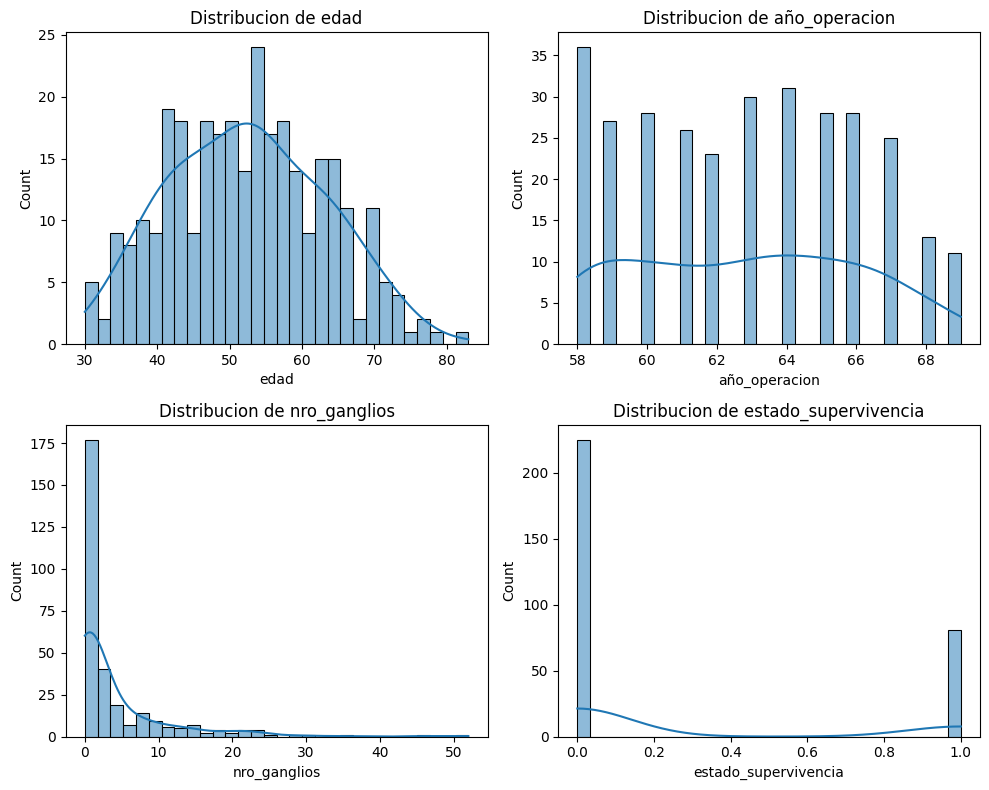

In [9]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(10,8))
axes=axes.flatten()
for i,col in enumerate(columnas):
  sns.histplot(df[col],bins=30,kde=True,ax=axes[i])
  axes[i].set_title(f'Distribucion de {col}')
plt.tight_layout()
plt.show()



**Gráfico de distribución de edad**

Podemos ver cómo la mayoría de los pacientes tienen entre 40 y 70 años con un pico entre los 50-60. El gráfico tiene forma de campana, por lo que se ve que las personas menores a 30 años y por encima de los 80 son escasas lo que, sugiere que la distribución esperada es para una población adulta, no joven ni anciana.


**Gráfico Distribución de año_operación**

La forma de este gráfico es bastante uniforme, no se ve una forma clara de campana, hay algunos picos. El gráfico nos dice que las operaciones se realizaron principalmente entre el año 1960 y el 1966, con algunos picos en el año 1958 y 1964, no hay un año central donde se concentren la mayoría de las operaciones.


**Gráfico de distribución del nro_ganglios**

Podemos ver una distribución cesgada a la derecha, donde mientras más avanzamos, podemos notar como el número de ganglios disminuye.

Lo que indica el gráfico es que la gran mayoría de los pacientes tiene un número muy bajo de ganglios axilares positivos entre 0-10 se concentran, y hay algunos que llegan incluso hasta los 50 ganglios. Acá más adelante vamos a poder ver los outliers en el boxplot, por la naturaleza de los datos y su distribución con puntos muy extremos.

**Gráfico de distribución de estado_supervivencia**

Podemos ver dos barras, ya que existen dos clases(0 y 1). La clase 0 representa a las personas que lograron sobrevivir más de cinco años y la clase 1 los que no sobrevivieron más de cinco años después de la operación. Podemos ver cómo la clase minoritari es la número 1, que son los que no sobrevivían.

Esto más adelante, nos va a hacer notar un desbalance en los datos reflejándose en los resultados del modelo.

###**Detección de outliers mediante Boxplot**

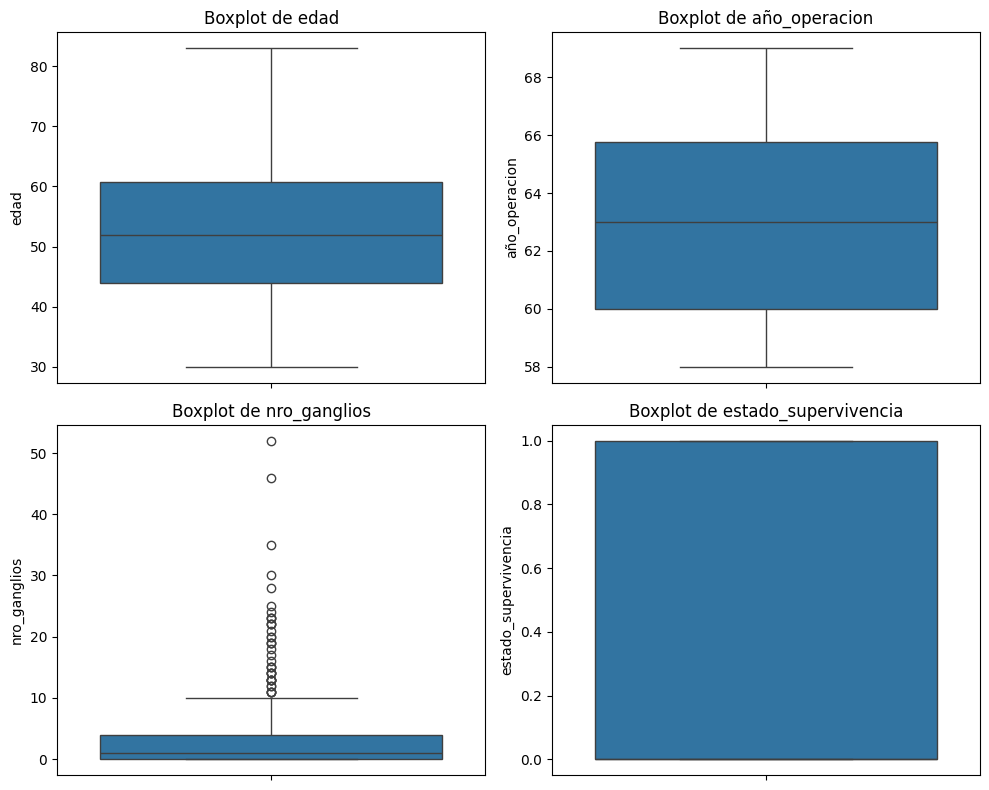

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(10,8))
axes=axes.flatten()
for i,col in enumerate(columnas):
  sns.boxplot(df[col],ax=axes[i])
  axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

**Boxplot de edad**

La caja principal del boxplot está centrada aproximadamente entre los 45 y 60 años, la mediana está alrededor de los 52/53. Podemos ver como los bigotes se extienden de manera relativamente simétrica, lo que sugiere una distribución bastante simétrica. No se obervan outliers.

**Boxplot de año operación**

En este caso la caja se encuentra aproximadamente entre entre el año 1960 y el 1966,. La mediana está aproximadamente en el año 1963 no se observan puntos aislados.

La distribucion de los bigotes es bastante simétrica, tampoco no se observan puntos aislados

**Boxplot de Numero de ganglios**

La caja está muy comprimida y muy cerca de cero (entre 0-5), confirmando que la gran mayoría de los pacientes tienen cero o muy pocos ganglios positivos..

Como vimos en el histograma este gráfico muestra gran cantidad de outliers por encima del bigote superior, representando a lo pacientes con números de ganglios positivos significativamente más altos que la mayoría de la población

**Boxplot de estado supervivencia**

Es una caja sólida que se extiende de cero a uno. Esto es porque respresentan una variable binaria.

###**Grafico de Dispersión**

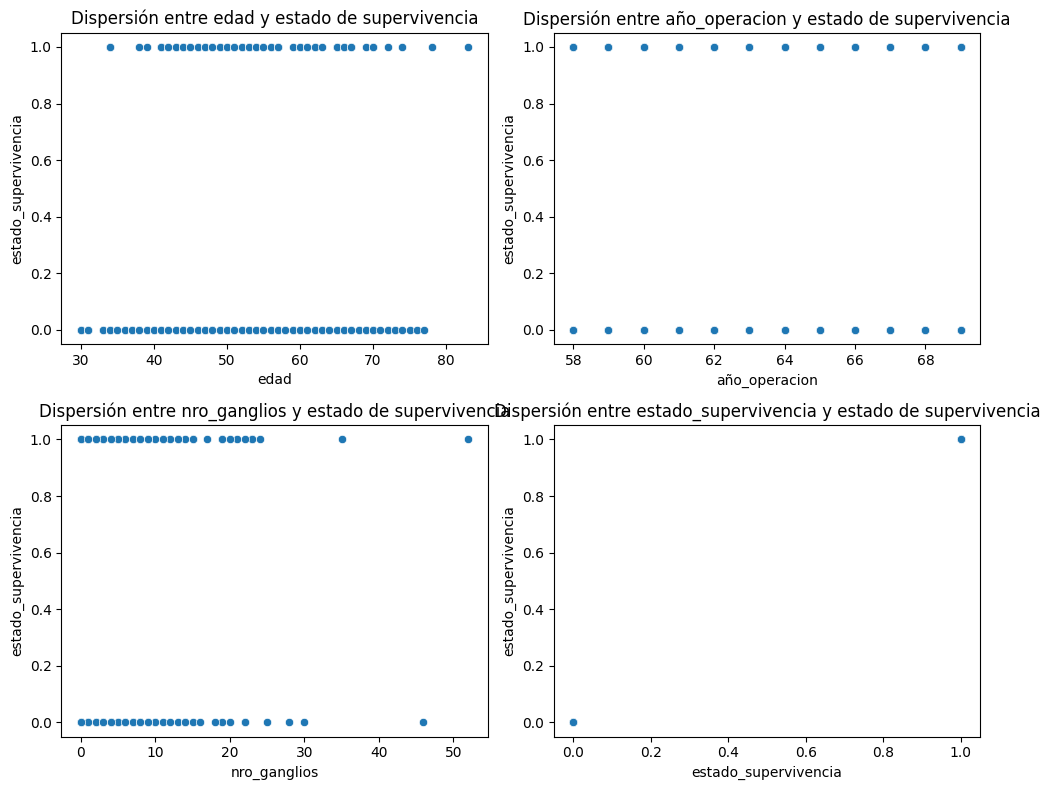

In [11]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(10,8))
axes=axes.flatten()
for i,col in enumerate(columnas):
  sns.scatterplot(x=col,y='estado_supervivencia',data=df,ax=axes[i])
  axes[i].set_title(f'Dispersión entre {col} y estado de supervivencia')
plt.tight_layout()
plt.show()

####**Explicacion de los graficos de dispersion**

**edad vs estado_supervivencia:**
En el eje X vemos la edad del paciente al recibir la operacion y en el eje Y su estado de supervivencia (1,2)

Podemos ver que los puntos se dispersan bastante en el eje X, significa que en cuanto a la edad del paceinte no podemos ver que los datos formen un patron. Tanto pacientes jovenes como adultos forman parte de la clase 1 y 2.


**año_operacion vs estado_supervivencia:**
En el eje X vemos el año en el que el paciente recibio la operacion y en el eje Y su estado de supervivencia (1,2).

Al igual que en el grafico anterior se ve como los puntos se superponen en la clase 1 y 2, osea que no hay un año que predomine en las clases a simple vista.

**nro_ganglios vs estado_supervivencia:**
En el eje X vemos el Nro de de ganglios axilares positivos que se le detectaron y en el eje Y su estado de supervivencia (1,2)

Bueno aca podemos ver datos un poco mas diferentes entre 1 y 2, hay una clara concentracion de puntos del lado izquierdo del grafico en los numeros mas bajos de ganglios en la clase 1 y 2. Pero mientras mas nro de ganglios tiene el paciente podemos ver como aumentas lo puntos en la clase 2 (muere antes de los 5 años) aunque son pocos los puntos podemos ver una de las primeras diferencias en los datos.


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

###**Missing values**

In [12]:
df.isnull().sum() #Mostramos el numero de valores nulos

,0
edad,0
año_operacion,0
nro_ganglios,0
estado_supervivencia,0


###**Manejo de Outliers**

Normalizamos usando StandarScaler


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separamos los features y el target
X=df.drop('estado_supervivencia', axis=1) #features
y=df['estado_supervivencia'] #target

#Dividimos el conjunto de entrenamiento y el de testeo en 80% y 20%- Stratify sirve para asegurar que
#tanto el conjunto de entrenamiento como el de testeo contengan ejemplos de pacientes que fallecieron y en una proporcion representativa, ya que la clase 2 es menor a la 1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)

#Escalamos los datos con StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

El dataset tiene 206 instancias, 3 variables caracteristica [edad, año_operacion, nro_ganglios] y una variable objetivo que es [estado_supervivencia'] todas de tipo int. Presenta una clasificacion binaria, ya que target tiene dos posibles clases o valores [1,2]




## 4. **Clasificación con logistic regression**  
En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.
   

### 4.1 Entrenamiento y evaluación

In [14]:
#importamos librerias necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [15]:
#Creamos el clasificador
clf=LogisticRegression()

#Entrenamos el clasificador
clf.fit(X_train_scaled,y_train)

#Hacemos predicciones
y_pred_lr=clf.predict(X_test_scaled)


### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

###**Generamos la matriz de confusion**

In [16]:
#generamos la matriz de confusion
conf_matrix=confusion_matrix(y_test,y_pred_lr)

#la imprimimos
print('MATRIZ DE CONFUSION:')
print(conf_matrix)

#calculamos las metricas
accuracy=accuracy_score(y_test,y_pred_lr)
precision=precision_score(y_test,y_pred_lr)
recall=recall_score(y_test,y_pred_lr)
f1=f1_score(y_test,y_pred_lr)

#las imprimimos
print('-----------------------------------------------------------------')
print('METRICAS:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

MATRIZ DE CONFUSION:
[[42  4]
 [12  4]]
-----------------------------------------------------------------
METRICAS:
Accuracy: 0.7419354838709677
Precision: 0.5
Recall: 0.25
F1: 0.3333333333333333


###**Explicacion de la matriz y metricas obtenidas**

La matriz nos ayuda a comparar las predicciones hechas por el modelo con los valores reales en un conjunto de prueba.

**Verdaderos Positivos (VP):**
Son los casos en los que el modelo predijo correctamente la clase positiva.

**Falsos Positivos (FP):**
 Son los casos en los que el modelo predijo la clase positiva incorrectamente (cuando en realidad era negativa).

**Verdaderos Negativos (VN):**
Son los casos en los que el modelo predijo correctamente la clase negativa.

**Falsos Negativos (FN):**
Son los casos en los que el modelo predijo la clase negativa incorrectamente (cuando en realidad era positiva)

-----------------------------------
*Clase 0 (sobrevivio)=Clase negativa*

*Clase 1 (fallecio)=Clase positiva*

------------------------------------

**EN NUESTRA MATRIZ**

>[[ 42 4]

>[ 12 4]]


- 4 verdaderos positivos: el modelo predijo bien que 4 pacientes fallecerian

- 12 falsos negativos: el modelo predijo que 12 sobrevivirian, pero no lo hicieron.

- 4 falsos positivo: el modelo predijo que 4 paciente fallecerian pero no lo hicieron.

- 42 verdaderos negativos: el modelo predijo que 42 pacientes sobrevivirian y lo hicieron.


-----------------------------------------

**METRICAS:**

>Accuracy: 0.7419354838709677
El obtuvo una exactitud de 74.19% (tanto de muerte como sobrevivencia), que es un numero bueno pero esta metrica no cuenta toda la historia si tenemos desequilibrio entre las clases (hay mas sobrevivientes que fallecidos). Es importante tener en cuenta que este resultado se debe en su mayoria al desbalance, el modelo puede favorecer a la calse mayoritaria que son los que viven.

>Precision: 0.5
Mide cuantas veces tuvo razon el modelo al intentar predecir que alguien moriria. Osea que el modelo tuvo razon el 50% de las veces, lo que no es muy bueno. Esto puede suceder porque el modelo no tiene tanta informacion en los datos para distinguir a quienes mueren y quienes sobreviven.

>Recall: 0.25
De todos los casos que realmente no sobrevivieron, el modelo identifico correctamente el 25%. Este es el valor mas grave hasta ahora, ya que el modelo falla en reconocer a la mayoria de casos de muerte, prefiere asumir que el paciente sobrevive. Esto se puede deber a que hay muy pocas filas donde la clase es=no sobrevive en el conjunto de entrenamiento, entonces el modelo no generaliza bien la clase.


>F1 score: 0.3333333333333333:
Es la medida armonica entre presicion y recall. Este valor nos indica que el modelo tiene un desempeño general bajo para lograr predecir la clase 1.

Ya vimos que el modelo tiene un Recall bajo, lo que indica que no sabe decidir bien cuando un paciente va a morir. Y una presicion media, un 50-50 de que acerte si un paciente sobrevive o no.


Estos resultados se pueden deber a:
- DESBALANCE DE LAS CLASES
- POCA INFORMACION O VARIABLES CON RELACION DEBIL PARA LA PREDICCION
- EL MODELO NO ES EL ADECUADO PARA ESTE CONJUNTO EN PARTICULAR (VEREMOS OTRO MODELO EN LE SIGUIENTE PUNTO)
- POCOS DATOS DE LA CLASE 1 (no sobrevive).




## 5- **Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

### 5.2 Entrenamiento del modelo.

Voy a elegir el modelo KNN, funciona bien con datasets pequeños como es mi caso.

Quiero aclarar que la forma en la que siempre calcule el numero de k optimo fue con el **grafico del codo**, entonces opte por consultar a Gemini cual era la mejor opcion para conseguir el numero de 'k' dandole ademas el contexto del dataset

In [17]:
#Importamos librerias necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report

#Escalado de características, aunque ya se halla hecho, lo mostramos para ver todo el proceso
scaler = StandardScaler()

# Ajustamos el escalador solo en el conjunto de entrenamiento y transformamos ambos conjuntos.
# Es vital no "aprender" de los datos de prueba para evitar fuga de información.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####Para comenzar use este prompt en Gemini para elegir el numero optimo de K de la manera mas eficiente teniendo en cuenta el contexto de mi dataset:
_necesito calcular el numero optimo de k para trabajar un modelo KNN sobre un dataset que tiene 64 filas, 4 columnas donde una de ellas contiene los dos tipos de clases_

Me sugirio calcular K usando **'Validacion Cruzada Estratificada (StratifiedKFold) con GridSearchCV':**

_RESPUESTA:_
Este sigue siendo el método más robusto. La clave es la "estratificación", que asegura que la proporción de clases se mantenga en cada división (fold) de la validación cruzada.

- ¿Por qué StratifiedKFold? En datasets pequeños, es vital que cada subconjunto (fold) tenga una representación proporcional de todas tus clases. Si no uso estratificación, un fold podría terminar con solo una clase, lo que causaría errores o una evaluación sesgada.
- Aumenta el número de cv (folds): Para datasets pequeños, a veces se sugiere usar más folds (ej. cv=5 o cv=10, o incluso LeaveOneOut si el dataset es muy pequeño, aunque este último es computacionalmente costoso). Más folds significan que el modelo se entrena y evalúa más veces en diferentes subconjuntos, lo que da una estimación más estable del rendimiento.

####**Investigacion**

La validación cruzada es una técnica fundamental en ML para evaluar la performance de un modelo predictivo de manera más robusta y confiable que si solo se utilizara una única división de los datos en conjuntos de entrenamiento y prueba.

Aborda estos problemas dividiendo el dataset original en múltiples subconjuntos (llamados "folds" o "pliegues"). El proceso se repite varias veces, donde el modelo se entrena y evalúa en diferentes combinaciones de estos folds.

En lugar de dividir tus datos una sola vez en entrenamiento y prueba, la validación cruzada los divide varias veces de diferentes maneras.

Que sea **estratificada** asegura que cada "fold" (tanto de entrenamiento como de prueba) mantenga la misma proporción de clases que el dataset original.

Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos, lo cual es una ventaja importante en problemas como la inferencia inversa, donde el número de muestras es muy pequeño.

In [18]:
#ENCONTRAR EL K ÓPTIMO CON GRIDSEARCHCV Y VALIDACIÓN CRUZADA ESTRATIFICADA
# Definimos un rango de valores de K a probar.
# Para un dataset de 64 filas (aprox. 51 en X_train), un K muy grande no es ideal.
# Nos aseguramos de incluir solo valores impares para K (para evitar empates en la votación).
# El límite superior de K se establece como la mitad del tamaño de X_train o 31, lo que sea menor.
max_k_in_range = min(len(X_train) // 2, 31)
k_range = list(range(1, max_k_in_range + 1, 2))

if not k_range or (1 not in k_range and len(X_train) > 0):
    k_range = sorted(list(set(k_range + [1])))

print(f"Valores de K a probar: {k_range}")

# Configuramos los parámetros para GridSearchCV.
param_grid = {'n_neighbors': k_range}

# Configuramos la validación cruzada estratificada.
# `n_splits=5` es un buen equilibrio para tu tamaño de dataset.
# `shuffle=True` y `random_state` aseguran reproducibilidad de los folds.
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creamos una instancia del clasificador KNN.
knn_base = KNeighborsClassifier()

# Configuramos GridSearchCV.
# `scoring='f1_weighted'` es una métrica robusta para clases posiblemente desequilibradas.
# `n_jobs=-1` usa todos los núcleos de tu CPU para acelerar el proceso.
grid_search = GridSearchCV(knn_base, param_grid, cv=cv_stratified, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Entrenamos GridSearchCV con los datos de entrenamiento ESCALADOS.
grid_search.fit(X_train_scaled, y_train)

# Obtenemos el mejor valor de K encontrado.
best_k = grid_search.best_params_['n_neighbors']
print(f"\n¡El MEJOR valor de K encontrado por GridSearchCV es: {best_k}!")
best_k=19
# Obtenemos la mejor puntuación de validación cruzada para ese K.
best_cv_score = grid_search.best_score_
print(f"La mejor puntuación de validación cruzada (f1_weighted) es: {best_cv_score:.4f}")


Valores de K a probar: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
Fitting 5 folds for each of 16 candidates, totalling 80 fits

¡El MEJOR valor de K encontrado por GridSearchCV es: 19!
La mejor puntuación de validación cruzada (f1_weighted) es: 0.7305


**METODO DEL CODO (Elbow Method), para confirmar si de verdad 19 es el numero de k optimo:**

La idea es la siguiente:

- Calculamos el F1-score para cada valor de K en un rango.
- Graficamos estos valores.
- Buscamos un "codo" en la curva, que es el punto donde la mejora en el rendimiento comienza a disminuir significativamente, o donde la curva se estabiliza.

Cálculo completado. Generando gráfica...


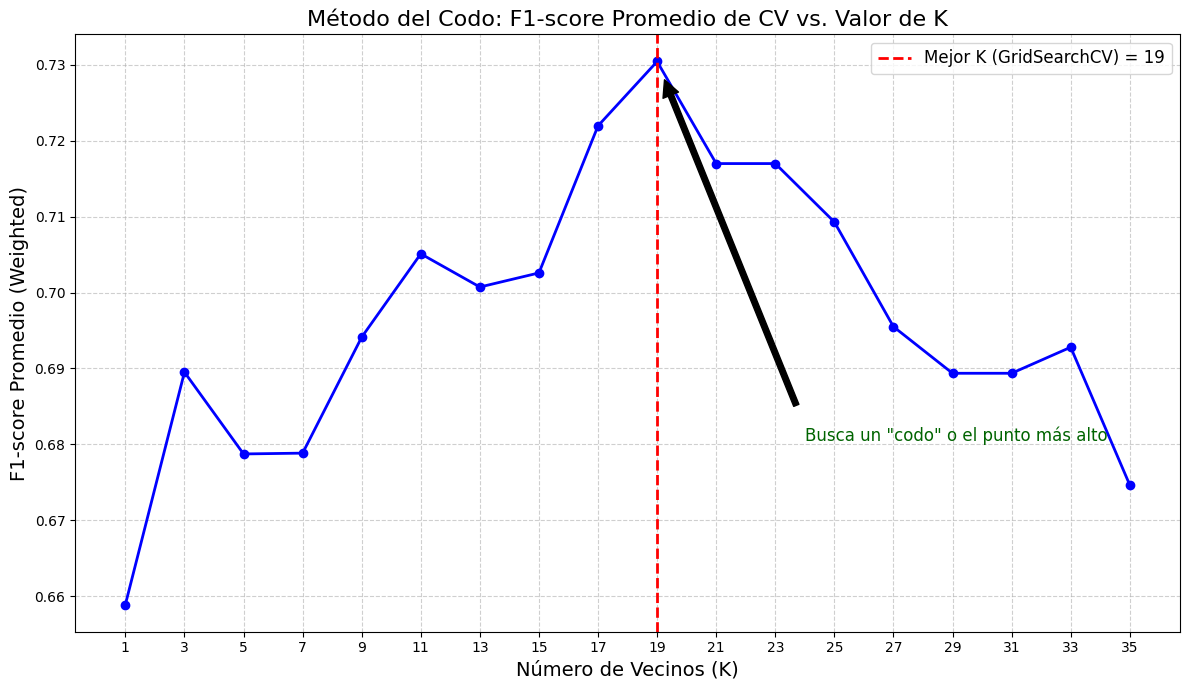


El valor de K que dio el F1-score promedio más alto en esta visualización es: 19 (F1-score: 0.7305)


In [19]:
#Definimos el rango de valores de K a probar.
max_k_visual = min(len(X_train_scaled) -1, 35)
k_values_to_plot = list(range(1, max_k_visual + 1, 2))

# Lista para almacenar los F1-scores promedio de validación cruzada para cada K
# Vamos a hacer una validación cruzada simplificada aquí para la gráfica
f1_scores_cv_avg = []

# Configuramos la validación cruzada estratificada (como en GridSearchCV)
cv_stratified_for_plot = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values_to_plot:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Lista temporal para almacenar los F1-scores de cada fold
    fold_f1_scores = []

    # Realizamos la validación cruzada manualmente para cada K
    for train_index, val_index in cv_stratified_for_plot.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index] # .iloc para Series

        knn.fit(X_train_fold, y_train_fold)
        y_val_pred = knn.predict(X_val_fold)
        fold_f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

    # Calculamos el promedio de los F1-scores de todos los folds para este K
    f1_scores_cv_avg.append(np.mean(fold_f1_scores))

print("Cálculo completado. Generando gráfica...")

#Graficamos los resultados
plt.figure(figsize=(12, 7))
plt.plot(k_values_to_plot, f1_scores_cv_avg, marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('Método del Codo: F1-score Promedio de CV vs. Valor de K', fontsize=16)
plt.xlabel('Número de Vecinos (K)', fontsize=14)
plt.ylabel('F1-score Promedio (Weighted)', fontsize=14)
plt.xticks(k_values_to_plot, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

#Usamos el best_k encontrado por GridSearchCV para comparación

try:
    plt.axvline(best_k, color='red', linestyle='--', linewidth=2, label=f'Mejor K (GridSearchCV) = {best_k}')
    plt.legend(fontsize=12)
except NameError:
    print("Variable 'best_k' no definida. Ejecuta primero la sección de GridSearchCV.")

plt.annotate('Busca un "codo" o el punto más alto', xy=(k_values_to_plot[np.argmax(f1_scores_cv_avg)], np.max(f1_scores_cv_avg)),
             xytext=(k_values_to_plot[np.argmax(f1_scores_cv_avg)] + 5, np.max(f1_scores_cv_avg) - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='darkgreen')

plt.tight_layout()
plt.show()

# Imprimir el K que dio el máximo F1-score en esta visualización
k_max_f1 = k_values_to_plot[np.argmax(f1_scores_cv_avg)]
max_f1_value = np.max(f1_scores_cv_avg)
print(f"\nEl valor de K que dio el F1-score promedio más alto en esta visualización es: {k_max_f1} (F1-score: {max_f1_value:.4f})")

###**Entrenamiento del modelo**

In [20]:
knn=KNeighborsClassifier(n_neighbors=19,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

### 5.3 Evaluación del desempeño

Realizamos la prediccion con el conjunto (X_test) y evaluamos el rendimiento del modelo

In [21]:
y_pred=knn.predict(X_test)

#Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Evaluar el rendimiento del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[40  6]
 [11  5]]
Accuracy: 0.7258064516129032
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.45      0.31      0.37        16

    accuracy                           0.73        62
   macro avg       0.62      0.59      0.60        62
weighted avg       0.70      0.73      0.71        62



###**CONCLUSIONES**

A nivel general el modelo Logistic Regression logro un mayor porcentaje de predicciones correctas:
- LR: 0.7419
- KNN: 0.7258

A nivel de predecir mejor la clase que falleceria antes de los 5 años, si comparamos las metricas. Podemos decir que el modelo KNN obtuvo un mejor recall, osea que detecto mejor la calse 1, y tambien tiene un F1-Score mas alto que en los resultados con el modelo Logistic Regression.


## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

Voy a probar modificar el hiperparametro **WEIGHT**. Este concepto se refiere a la **importancia o influencia** que le damos a cada uno de los vecinos mas cercanos cuando el moelo realiza una prediccion.

Hay 2 formas predefinidas para ponderar a los vecinos en 'weight', o sino una personalizada:
- **Uniform:** Donde todos los vecinos mas ceracnos que identifique, tienen exactamente la misma importancia al tomardesiciones el modelo. La opinion de todos los vecinos importa por igual.

- **Distance:** Donde los vecinos mas cercanos tienen mayor importancia en su voto.

- **Callable:** Donde se le dice al modelo que o elija ninguna de las formas anteriores, sino que use una regla propia que defino yo. Esto llevaria mas trabajo ya que se deberia escribir el codigo, definirla funcion, diseñar , implemetar y probar una logica propia de ponderacion, lo que requiere conocimientos mas avanzados tambien.

In [22]:
from sklearn.metrics import classification_report

#Usamos el best_k que calculamos
weight_options=['uniform','distance']

for weight in weight_options:
  print(f'\nModelo KNN con weight',{weight})
  knn=KNeighborsClassifier(n_neighbors=best_k,weights=weight)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)

  print('Matriz de confusion:')
  print(confusion_matrix(y_test,y_pred))

  print('Reporte de clasificacion')
  print(classification_report(y_test,y_pred))


Modelo KNN con weight {'uniform'}
Matriz de confusion:
[[40  6]
 [11  5]]
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.45      0.31      0.37        16

    accuracy                           0.73        62
   macro avg       0.62      0.59      0.60        62
weighted avg       0.70      0.73      0.71        62


Modelo KNN con weight {'distance'}
Matriz de confusion:
[[41  5]
 [11  5]]
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        46
           1       0.50      0.31      0.38        16

    accuracy                           0.74        62
   macro avg       0.64      0.60      0.61        62
weighted avg       0.71      0.74      0.72        62



Bueno en general podemos ver una mejora cambiando este hiperparametro de weight='uniform' <-- a --> weight='distance'.

- Precision: el modelo con distance mejoro levemente la precision, asi prediciendo con un poco mas de seguridad los casoso negativos reales.

- Recall: en este aspecto el modelo se mantuvo, sigue detectando solo al 31% de los que no sobrevivieron.

- F1-Score: aumento levemente tambien.

- Accuracy: ambos modelos obtuvieorn uno similar, aumentando muy poco cuando usamos 'distance'.

- Support: podemos ver claramente como la clase 1 es menor.

Bueno en resumen vemos una mejora minima cambiando este hiperparametro


Podemos cambiar el hiperparametro 'metric'='minkowski' que es el que viene por default, lo cambie por 'euclidean' pero la verdad no genero ningun cambio.

In [23]:
knn=KNeighborsClassifier(n_neighbors=19,weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [24]:
y_pred=knn.predict(X_test)

#Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Evaluar el rendimiento del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[41  5]
 [11  5]]
Accuracy: 0.7419354838709677
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        46
           1       0.50      0.31      0.38        16

    accuracy                           0.74        62
   macro avg       0.64      0.60      0.61        62
weighted avg       0.71      0.74      0.72        62



## 6- Conclusiones

Fundamente, justifique con sus palabras.

Considero que logre hacer las consignas correctamente, si bien el dataset no tuvo los mejores resultados debido a sus caracteristicas, lo importante fue haber mejorado su rendimiento buscando otra opcion de modelo que me favorecio.


# Referencias

Mencione los recursos utilizados

Fui mencionando las veces que use recursos externos como IAs y  material teorico de las clases.

**Validacion cruzada**
https://scikit-learn.org/stable/modules/cross_validation.html